<a href="https://colab.research.google.com/github/TELLA-hub/Data-hub-/blob/main/MATH_582_(Final_Project)_Ibrahim_Tella_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

Question 1

In [ ]:
# Defining my PCA function
def PCA582(X, d, N, M, standardization):
    """
    Perform Principal Component Analysis (PCA) on the dataset X.

    Parameters:
    X : ndarray
        The input data matrix of size d-by-N.
    d : int
        The dimensionality of the data (number of features).
    N : int
        The number of data points.
    M : int
        The number of principal components to keep.
    standardization : bool
        If True, standardize the data; otherwise, do not.

    Returns:
    B : ndarray
        Matrix of size d-by-M containing the principal components.
    Z : ndarray
        Matrix of size M-by-N containing the low-dimensional coordinates.
    mu : ndarray
        The mean vector of size d.
    sigma : ndarray
        The standard deviation vector of size d.
    """
    # Computing the mean (mu) and standard deviation (sigma)
    if standardization:
        mu = np.mean(X, axis=1, keepdims=True)
        X2 = X - mu
        sigma = np.std(X2, axis=1, keepdims=True)
        sigma[sigma < np.finfo(float).eps] = 1
    else:
        mu = np.zeros((d, 1))
        X2 = X
        sigma = np.ones((d, 1))


    X2 = X2 / sigma

    # Computing the SVD of the standardized data
    U, S, Vt = np.linalg.svd(X2, full_matrices=False)
    B = U[:, :M]

    # Computing the low-dimensional coordinates
    Z = np.dot(B.T, X2)

    return B, Z, mu, sigma

Question 2

Results for M = 1:

Err and RelErr are 2.912064e-01 7.316431e-02



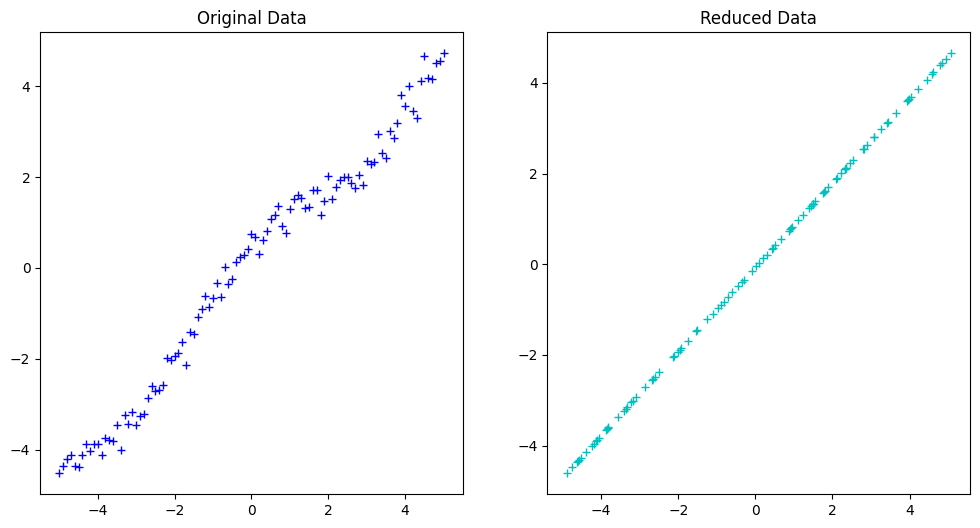

Results for M = 2:

Err and RelErr are 1.413428e-15 3.580081e-16



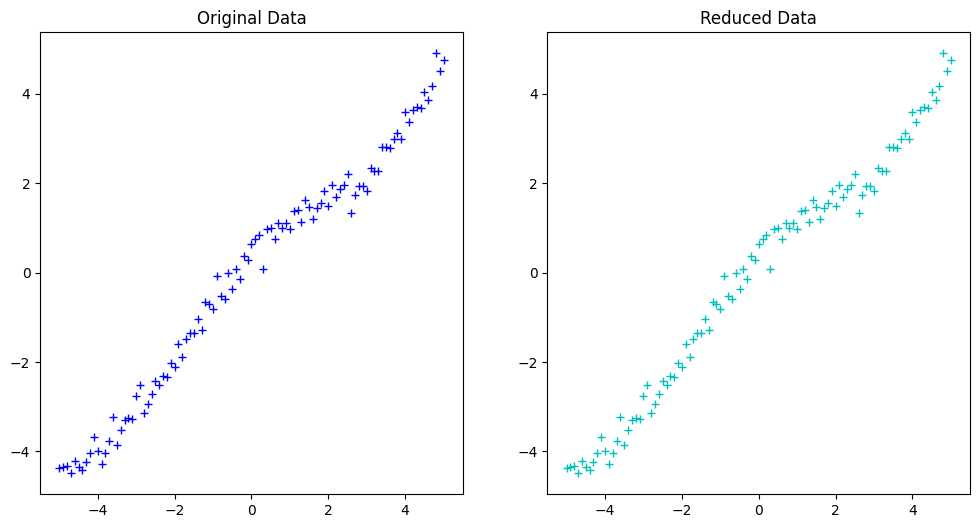

In [ ]:
# Defining my Test Function
def PCA582_test1(M):
    """
    Test the PCA582 function with a generated dataset.

    Parameters:
    M : int
        The number of principal components to use.
    """
    # Generating the data dataset based on Question 2
    N = 101
    t = np.linspace(-5, 5, N)
    X = np.zeros((2, N))
    X[0, :] = t
    X[1, :] = t + 0.5 * (-np.sin(t / 5) + np.cos(t))
    X[1, :] += np.random.normal(0, 0.2, size=t.shape)

    # Plot the original data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(X[0, :], X[1, :], 'b+', linewidth=1.5)
    plt.title('Original Data')

    # Perform PCA
    d = 2
    if M > d:
        M = d
    B, Z, mu, sigma = PCA582(X, d, N, M, standardization=True)

    # Compute the reduced data
    XX = np.dot(np.diag(sigma.flatten()), np.dot(B, Z)) + mu

    # Plot the reduced data
    plt.subplot(1, 2, 2)
    plt.plot(XX[0, :], XX[1, :], 'c+', linewidth=1.5)
    plt.title('Reduced Data')

    # Compute errors
    Err = np.sqrt(np.sum((X - XX) ** 2) / N)
    RelErr = Err / np.sqrt(np.sum(X ** 2) / N)
    print(f"\nErr and RelErr are {Err:e} {RelErr:e}\n")

    plt.show()


# Run the tests with M = 1 and M = 2
print("Results for M = 1:")
PCA582_test1(M=1)

print("Results for M = 2:")
PCA582_test1(M=2)


Question 3 & 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Loading the MNIST dataset
data = fetch_openml('mnist_784', version=1, as_frame=False)
X = data.data  # Pixel values
y = data.target.astype(int)  # Labels

X = X[:60000]
y = y[:60000]

Applying PCA with 1 components...
Applying PCA with 10 components...
Applying PCA with 100 components...


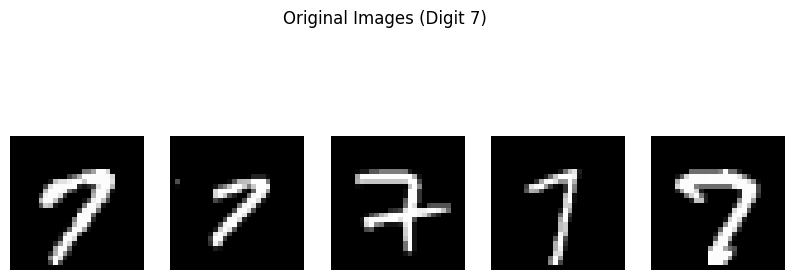

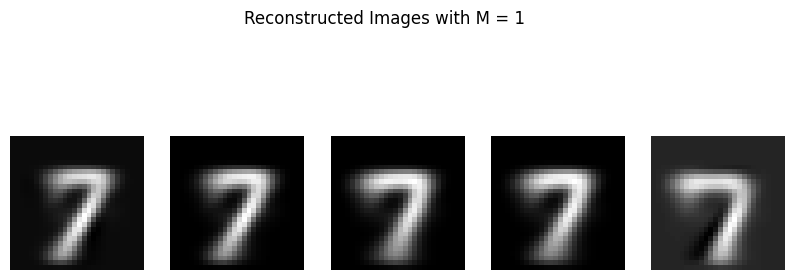

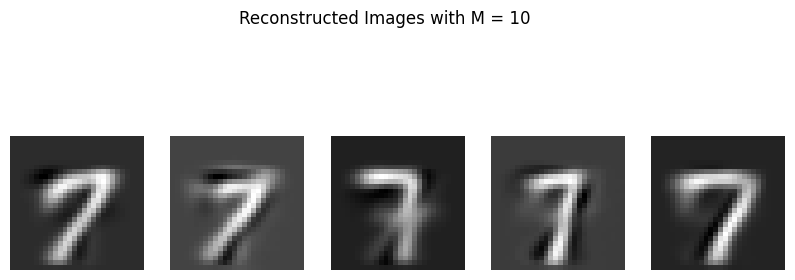

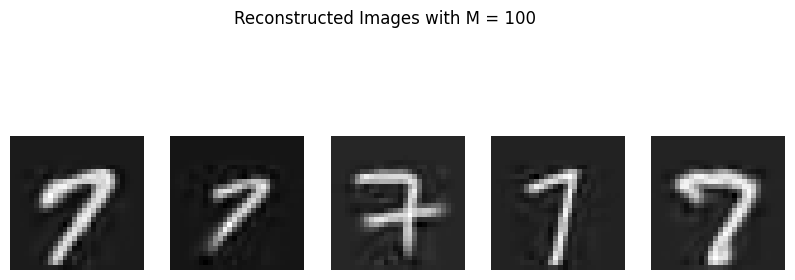

In [ ]:
# Selecting the digit "7" from the dataset
X_7 = X[y == 7]

original_images = X_7

# Applying PCA with different numbers of components i.e. 1,10, 100
components = [1,10,100]
reconstructed_images = {}
pca_models = {}

for m in components:
    print(f"Applying PCA with {m} components...")
    pca = PCA(n_components=m)
    X_reduced = pca.fit_transform(original_images)
    X_reconstructed = pca.inverse_transform(X_reduced)
    reconstructed_images[m] = X_reconstructed
    pca_models[m] = pca

# Plotting the original and reconstructed images
def plot_images(images, title, n_cols=5):
    plt.figure(figsize=(10, 4))
    for i, img in enumerate(images):
        plt.subplot(1, n_cols, i + 1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Displaying  the original images the reconstructed images for each M values
plot_images(original_images[:5], "Original Images (Digit 7)")

for m in components:
    plot_images(reconstructed_images[m][:5], f"Reconstructed Images with M = {m}")